In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "TCOG"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TCOG/baseline

Average verified rate: 0.959743479825711

Average of error rates: 0.040890625

Total token count: 1803211



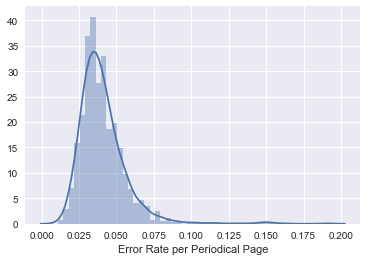

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 50 )

[('ñ', 3529),
 ("'", 3320),
 ('-', 3126),
 ("officers'", 1335),
 (')', 1176),
 ('¥', 794),
 ('e', 594),
 ('re-', 574),
 ('minutes)', 526),
 ('con-', 524),
 ('in-', 468),
 ('tion', 462),
 ('d', 449),
 ('g', 405),
 ('t', 372),
 ('be-', 352),
 ('r', 350),
 ('m', 346),
 ('mis-', 300),
 ('w', 293),
 ('(', 278),
 ('de-', 276),
 ('id', 263),
 ('pp', 253),
 ('com-', 235),
 ('ment', 230),
 ('ex-', 208),
 ('(ten', 207),
 ('f', 199),
 ('ñid', 198),
 ('(five', 188),
 ('mem-', 183),
 ('sionary', 182),
 ('en-', 181),
 ('n', 178),
 ('(see', 178),
 ('per-', 178),
 ("'the", 169),
 ('ex', 166),
 ('pro-', 164),
 ('dis-', 162),
 ('tions', 159),
 ('pre-', 147),
 ('soul-winning', 143),
 ('ñselected', 142),
 ('un-', 137),
 ('ful', 135),
 ('ence', 135),
 ('ñthe', 130),
 ('(to', 129),
 (']', 128),
 ('bers', 125),
 ('im-', 121),
 ('ers', 121),
 ('mission-', 117),
 ('ary', 114),
 ("'i", 111),
 ('ber', 106),
 ('meet-', 105),
 ('to-', 98),
 ('ac-', 96),
 ('-id', 94),
 ('some-', 90),
 ('--', 90),
 ('an-', 89),
 ('s

## Review Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)

[('ñ', 3529),
 (')', 1176),
 ('¥', 794),
 ('minutes)', 526),
 ('(', 278),
 ('(ten', 207),
 ('ñid', 198),
 ('(five', 188),
 ('(see', 178),
 ('ñselected', 142),
 ('ñthe', 130),
 ('(to', 129),
 (']', 128),
 ('/', 86),
 ('(fifteen', 68),
 ('(the', 64),
 ('(twenty', 56),
 ('(concluded', 49),
 ('(for', 45),
 ('ñthis', 43),
 ('[the', 41),
 ('ña', 38),
 ('¥¥', 38),
 ('ñmrs', 37),
 ('(this', 32),
 ('ñadapted', 31),
 ('ñin', 29),
 ('ñthat', 28),
 ('_', 28),
 ('(a)', 27),
 ('ñhave', 27),
 ('`', 26),
 ('ñit', 24),
 ('ñand', 24),
 ('(b)', 24),
 ('(a', 23),
 ('(or', 22),
 ('\\', 22),
 ('[', 21),
 ('ñwhat', 19),
 ('(plans', 18),
 ('ã', 18),
 ('reports)', 18),
 ('(john', 17),
 ('ñfor', 17),
 ('ñnot', 17),
 ('ñthese', 17),
 ('*', 16),
 ('(c)', 16),
 ('talk)', 16),
 ('junior)', 16),
 ('`the', 15),
 ('ñjohn', 15),
 ('(let', 15),
 ('ñno', 14),
 ('cents)', 14),
 ('(acts', 14),
 ('ñlet', 14),
 ('(matt', 14),
 ('ñi', 14),
 ('ñto', 14),
 ('ñwe', 14),
 ('ñj', 14),
 ('ñamos', 13),
 ('(luke', 12),
 ('ñibid', 12)

## Correction 1 -- Normalize Characters

In [14]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TCOG/correction1

Average verified rate: 0.9670947548262806

Average of error rates: 0.03345089285714285

Total token count: 1798072



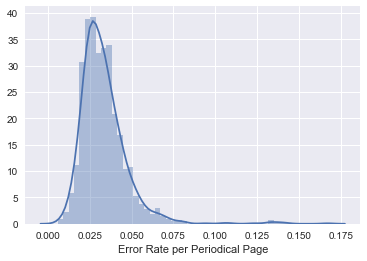

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 3370),
 ('-', 3155),
 ("officers'", 1335),
 ('e', 613),
 ('re-', 576),
 ('con-', 524),
 ('d', 474),
 ('in-', 473),
 ('id', 467),
 ('tion', 462),
 ('g', 413),
 ('t', 384),
 ('r', 362),
 ('be-', 354),
 ('m', 352),
 ('w', 303),
 ('mis-', 301),
 ('de-', 276),
 ('pp', 253),
 ('com-', 235),
 ('ment', 231),
 ('f', 217),
 ('ex-', 208),
 ('mem-', 183),
 ('sionary', 182),
 ('en-', 181),
 ('n', 180),
 ('per-', 178),
 ("'the", 170),
 ('ex', 169),
 ('pro-', 164),
 ('dis-', 162),
 ('tions', 160),
 ('pre-', 147),
 ('soul-winning', 147),
 ('un-', 138),
 ('ful', 135),
 ('ence', 135),
 ('bers', 125),
 ('im-', 122),
 ('ers', 121),
 ('mission-', 117),
 ('ary', 115),
 ("'i", 111),
 ('ber', 106),
 ('meet-', 105),
 ('to-', 98),
 ('--', 96),
 ('ac-', 96),
 ('-id', 94)]

## Correction 2 -- Correct Line Endings

In [20]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TCOG/correction2

Average verified rate: 0.9816785590488941

Average of error rates: 0.018890625

Total token count: 1779991



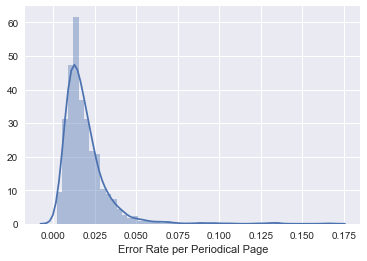

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 3370),
 ('-', 3144),
 ("officers'", 1335),
 ('e', 612),
 ('d', 474),
 ('id', 467),
 ('g', 411),
 ('t', 383),
 ('r', 361),
 ('m', 351),
 ('w', 303),
 ('pp', 253),
 ('f', 216),
 ('n', 179),
 ("'the", 170),
 ('ex', 169),
 ('soul-winning', 150),
 ("'i", 111),
 ('--', 96),
 ('-id', 94),
 ("'tis", 83),
 ("the'", 63),
 ('eze', 59),
 ("an'", 58),
 ('th', 57),
 ('mal', 54),
 ("'of", 54),
 ("'a", 49),
 ('good-by', 48),
 ("'and", 47),
 ('tbe', 45),
 ('mayta', 43),
 ('-the', 43),
 ("'to", 42),
 ('x', 42),
 ('scudder', 40),
 ("'he", 38),
 ('u', 37),
 ('agtte', 36),
 ("'in", 36),
 ('five-minute', 36),
 ('soul-winners', 36),
 ('z', 35),
 ('k', 35),
 ("to'", 34),
 ('follow-up', 33),
 ('soul-winner', 33),
 ('seventhday', 31),
 ('missi', 30),
 ('mt', 29)]

## Correction 3 -- Remove Extra Dashes

In [26]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

TCOG19140101-V01-01-page1.txt: [('-', '')]
TCOG19140101-V01-01-page10.txt: [('-', ''), ('-', '')]
TCOG19140101-V01-01-page11.txt: [('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', '')]
TCOG19140101-V01-01-page12.txt: [('-money', 'money'), ('-', '')]
TCOG19140101-V01-01-page13.txt: [('-create', 'create'), ('-', '')]
TCOG19140101-V01-01-page14.txt: [('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-dying', 'dying')]
TCOG19140101-V01-01-page15.txt: [('-', '')]
TCOG19140101-V01-01-page16.txt: [('-S', 'S'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('I-', 'I'), ('-', ''), ('sec-', 'sec')]
TCOG19140101-V01-01-page2.txt: [('-report', 'report')]
TCOG19140101-V01-01-page3.txt: [('-', ''), ('espe-', 'espe')]
TCOG19140101-V01-01-page4.txt: [('-planned', 'planned')]
TCOG19140101-V0

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TCOG/correction3

Average verified rate: 0.9852239299762794

Average of error rates: 0.015097470238095241

Total token count: 1780311



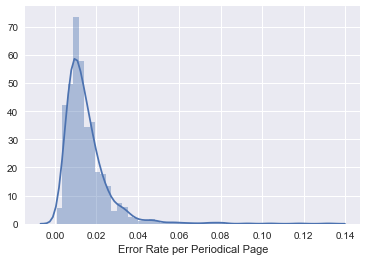

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 3395),
 ("officers'", 1338),
 ('e', 628),
 ('id', 541),
 ('d', 477),
 ('g', 417),
 ('t', 402),
 ('r', 380),
 ('m', 355),
 ('w', 308),
 ('pp', 253),
 ('f', 218),
 ('n', 192),
 ('ex', 173),
 ("'the", 171),
 ("'i", 111),
 ("'tis", 83),
 ("the'", 64),
 ('th', 60),
 ('soul-winning', 60),
 ("an'", 59),
 ('co', 59),
 ('eze', 59),
 ('mal', 54),
 ("'of", 54),
 ("'a", 50),
 ('re', 49),
 ("'and", 47),
 ('tbe', 45),
 ('x', 44),
 ('mayta', 43),
 ("'to", 42),
 ('u', 42),
 ('scudder', 40),
 ("'he", 38),
 ('agtte', 36),
 ('k', 36),
 ("'in", 36),
 ('z', 35),
 ("to'", 34),
 ('seventhday', 31),
 ('missi', 30),
 ('lb', 30),
 ('mt', 29),
 ("'for", 29),
 ("'what", 29),
 ('ro', 28),
 ("'we", 26),
 ('-', 26),
 ("'it", 26)]

## Correction 4 -- Remove extra quotation marks 

In [32]:
# %load shared_elements/remove_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

TCOG19140101-V01-01-page14.txt: [("'Before", 'Before'), ("'Twas", 'Twas')]
TCOG19140101-V01-01-page15.txt: [("'for", 'for'), ("'There", 'There')]
TCOG19140101-V01-01-page3.txt: [("'and", 'and'), ("'giving", 'giving')]
TCOG19140101-V01-01-page4.txt: [("'points", 'points'), ("'close", 'close')]
TCOG19140101-V01-01-page5.txt: [("'to", 'to')]
TCOG19140101-V01-01-page6.txt: [("'to", 'to')]
TCOG19140101-V01-01-page7.txt: [("'Gospel", 'Gospel')]
TCOG19140101-V01-01-page8.txt: [("'lives", 'lives'), ("'He", 'He')]
TCOG19140101-V01-01-page9.txt: [("'had", 'had'), ("'cause", 'cause')]
TCOG19140201-V01-02-page10.txt: [("'The", 'The'), ('\'sense."', 'sense."')]
TCOG19140201-V01-02-page11.txt: [("'Had", 'Had')]
TCOG19140201-V01-02-page14.txt: [("'Neath", 'Neath'), ("'sister", 'sister')]
TCOG19140201-V01-02-page16.txt: [("'Bout", 'Bout'), ("'fore", 'fore')]
TCOG19140201-V01-02-page5.txt: [("'Christ.", 'Christ.')]
TCOG19140201-V01-02-page6.txt: [("'Search", 'Search'), ("'Bible", 'Bible')]
TCOG19140201

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TCOG/correction4

Average verified rate: 0.9867158041488256

Average of error rates: 0.013583333333333333

Total token count: 1780311



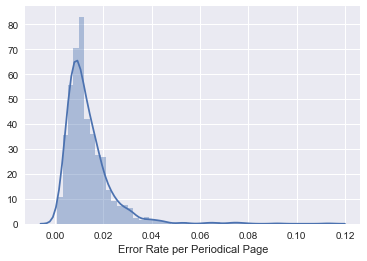

In [35]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [36]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 3299),
 ("officers'", 1329),
 ('e', 632),
 ('id', 542),
 ('d', 478),
 ('g', 417),
 ('t', 407),
 ('r', 381),
 ('m', 360),
 ('w', 308),
 ('pp', 253),
 ('f', 222),
 ('n', 195),
 ('ex', 173),
 ("the'", 62),
 ('th', 60),
 ('co', 60),
 ('soul-winning', 60),
 ("an'", 59),
 ('eze', 59),
 ('mal', 54),
 ('re', 53),
 ('tbe', 45),
 ('x', 44),
 ('mayta', 43),
 ('u', 42),
 ('scudder', 40),
 ('agtte', 36),
 ('z', 36),
 ('k', 36),
 ("to'", 34),
 ('seventhday', 31),
 ('missi', 30),
 ('lb', 30),
 ('mt', 29),
 ('ro', 28),
 ('nd', 26),
 ('-', 26),
 ('epartment', 26),
 ('cburth', 25),
 ('ft', 24),
 ('cburtb', 24),
 ("and'", 24),
 ('hsi', 24),
 ('good-by', 24),
 ("leaders'", 23),
 ('hasan', 23),
 ('hunchy', 23),
 ('al', 22),
 ('tion', 22)]

## Correction 5 -- Rejoin Split Words

In [38]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

TCOG19140101-V01-01-page14.txt: [('Foreig', 'n')]
TCOG19140101-V01-01-page16.txt: [('ti', 'l')]
TCOG19140101-V01-01-page8.txt: [('unsc', 'reened')]
TCOG19140201-V01-02-page11.txt: [('Throug', 'h')]
TCOG19140201-V01-02-page2.txt: [('pr', 'each')]
TCOG19140201-V01-02-page4.txt: [('formi', 'dable')]
TCOG19140201-V01-02-page8.txt: [('conditio', 'ns')]
TCOG19140301-V01-03-page9.txt: [('sti', 'fling')]
TCOG19140401-V01-04-page10.txt: [('Nez', 'Perce')]
TCOG19140401-V01-04-page15.txt: [('swif', 'tly')]
TCOG19140401-V01-04-page8.txt: [('Mis', 'sions')]
TCOG19140501-V01-05-page16.txt: [('Asso', 'ciation'), ('re', 'sults')]
TCOG19140501-V01-05-page2.txt: [('pa', 'ge'), ('ge', 'o')]
TCOG19140501-V01-05-page4.txt: [('prohibi', 'tion')]
TCOG19140601-V01-06-page14.txt: [('Ning', 'po')]
TCOG19140601-V01-06-page2.txt: [('disf', 'ellowshiped')]
TCOG19140801-V01-08-page12.txt: [('Patri', 'archs')]
TCOG19140801-V01-08-page13.txt: [('Ro', 'mans')]
TCOG19140901-V01-09-page15.txt: [('Sik', 'Kim')]
TCOG19141

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TCOG/correction5

Average verified rate: 0.986843103119939

Average of error rates: 0.013447172619047619

Total token count: 1780131



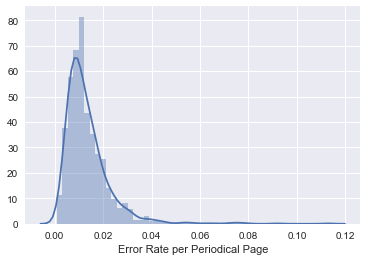

In [41]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [42]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 3299),
 ("officers'", 1329),
 ('e', 630),
 ('id', 541),
 ('d', 478),
 ('g', 416),
 ('t', 403),
 ('r', 380),
 ('m', 360),
 ('w', 308),
 ('pp', 253),
 ('f', 222),
 ('n', 195),
 ('ex', 173),
 ("the'", 62),
 ('th', 60),
 ('soul-winning', 60),
 ("an'", 59),
 ('eze', 59),
 ('mal', 54),
 ('tbe', 45),
 ('x', 44),
 ('mayta', 43),
 ('u', 42),
 ('scudder', 40),
 ('agtte', 36),
 ('z', 36),
 ('re', 36),
 ('k', 36),
 ("to'", 34),
 ('seventhday', 31),
 ('missi', 30),
 ('lb', 30),
 ('mt', 29),
 ('ro', 27),
 ('nd', 26),
 ('-', 26),
 ('epartment', 26),
 ('cburth', 25),
 ('ft', 24),
 ('cburtb', 24),
 ('hsi', 24),
 ("and'", 24),
 ('good-by', 24),
 ("leaders'", 23),
 ('hasan', 23),
 ('hunchy', 23),
 ('co', 22),
 ('pa', 21),
 ('-id', 20)]

## Correction 6 -- Rejoin Split Words II

In [44]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

TCOG19140101-V01-01-page13.txt: [('m', 'om')]
TCOG19140201-V01-02-page1.txt: [('pro', 'tem')]
TCOG19140301-V01-03-page9.txt: [('f', 'ancy')]
TCOG19140401-V01-04-page1.txt: [('in', 'struction')]
TCOG19140501-V01-05-page16.txt: [('Move', 'ment')]
TCOG19140501-V01-05-page4.txt: [('prohibi', 'tion')]
TCOG19140601-V01-06-page1.txt: [('a', 'mi')]
TCOG19140601-V01-06-page15.txt: [('Yang', 'tze')]
TCOG19140601-V01-06-page4.txt: [('The', 'se')]
TCOG19140701-V01-07-page1.txt: [('sin', 'gle')]
TCOG19140701-V01-07-page12.txt: [('the', 'Se')]
TCOG19140801-V01-08-page12.txt: [('Patri', 'archs')]
TCOG19140801-V01-08-page2.txt: [('West', 'ern')]
TCOG19140901-V01-09-page13.txt: [('A', 'fter')]
TCOG19140901-V01-09-page15.txt: [('Jun', 'ior')]
TCOG19140901-V01-09-page16.txt: [('J', 'esus')]
TCOG19140901-V01-09-page7.txt: [('Span', 'ish')]
TCOG19140901-V01-09-page9.txt: [('are', 'ca')]
TCOG19141001-V01-10-page14.txt: [('M', 'ses')]
TCOG19141001-V01-10-page9.txt: [('are', 'ca')]
TCOG19141101-V01-11-page9.t

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TCOG/correction6

Average verified rate: 0.9869422784886932

Average of error rates: 0.013345238095238096

Total token count: 1779943



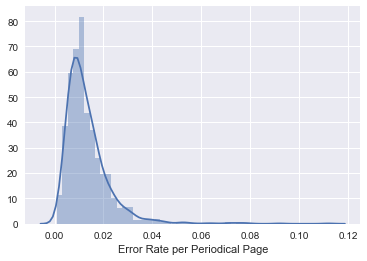

In [47]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [48]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 3299),
 ("officers'", 1329),
 ('e', 625),
 ('id', 541),
 ('d', 475),
 ('g', 416),
 ('t', 402),
 ('r', 377),
 ('m', 355),
 ('w', 305),
 ('pp', 253),
 ('f', 218),
 ('n', 194),
 ('ex', 173),
 ("the'", 62),
 ('soul-winning', 60),
 ("an'", 59),
 ('eze', 59),
 ('th', 57),
 ('mal', 54),
 ('tbe', 45),
 ('x', 44),
 ('mayta', 43),
 ('scudder', 40),
 ('u', 40),
 ('agtte', 36),
 ('z', 36),
 ('k', 36),
 ("to'", 34),
 ('seventhday', 31),
 ('missi', 30),
 ('lb', 30),
 ('mt', 29),
 ('re', 28),
 ('ro', 27),
 ('-', 26),
 ('nd', 25),
 ('cburth', 25),
 ('ft', 24),
 ('cburtb', 24),
 ('hsi', 24),
 ("and'", 24),
 ('good-by', 24),
 ('epartment', 24),
 ('hasan', 23),
 ("leaders'", 23),
 ('hunchy', 23),
 ('co', 22),
 ('pa', 21),
 ('-id', 20)]

## Review Remaining Errors

In [49]:
GoH.reports.docs_with_high_error_rate(summary)

[]